# Mengenal Situasi Keadaan Jalan di The Loop Kota Chicago ke Bandara O'Hare pada Hari Sabtu Saat Cuaca Hujan

**Pendahuluan <a id='intro'></a>**

Dalam project ini, saya akan mencoba menganalisa data dan melakukan uji hipotesa untuk mengenal situasi/memahami dan menguji perubahan durasi selama perjalanan dari The Loop (salah satu pusat bisnis) di kota Chicago ke bandara international O'Hare, khususnya pada hari Sabtu saat cuaca hujan. Dengan menganalisa secara terstruktur, saya akan mengeksplorasi data, merumuskan hipotesis, dan melakukan pengujian statistik untuk menentukan apakah perubahan yang signifikan terjadi, dan mengambil kesimpulan berdasarkan temuan saya. Proyek ini bertujuan untuk mengenal/memahami situasi keadaan jalan dari The Loop ke bandara international O'Hare Chicago saat kondisi cuaca hujan terhadap perjalanan menuju bandara dan dapat memberikan insight yang berharga bagi industri transportasi dan pengguna jasa transportasi.

**Tujuan:**

Project ini merupakan hasil dari SQL yang akan dianalisis menggunakan Python. Tujuan dari proyek ini adalah untuk memahami apakah terdapat perubahan signifikan dalam durasi perjalanan dari Loop ke Bandara Internasional O'Hare saat kondisi cuaca hujan pada hari Sabtu. Project ini bertujuan untuk menguji hipotesis mengenai pengaruh kondisi cuaca terhadap perjalanan ke bandara dan memberikan wawasan yang berguna dalam industri transportasi. 


Berikut rincian yang akan kita lewati:

*Tahapan yang Dilakukan*

**Langkah 1: Insialisasi**

- Memanggil data library yang dibutuhkan

  -# *List library yang digunakan*
  
     * import pandas as pd
     * import matplotlib.pyplot as plt
     * import seaborn as sns
     * import numpy as np
     * from datetime import datetime, timedelta
     * from scipy import stats
     * from scipy.stats import levene, shapiro, ttest_ind, mannwhitneyu
     

**Langkah 2: Memuat Dataset**

**2.1. Analisis data eksposure (Python) dengan memuat dataset: `/datasets/project_sql_result_01.csv` dan `/datasets/project_sql_result_04.csv`.**

* Ada beberapa Sub Tahapan :

  **2.1.1. Mempelajari isi data**
  
  **2.1.2. Memastikan tipe datanya sudah benar**
  
  **2.1.3. Mengindentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran**
  
  **2.1.4. Membuat grafik untuk perusahaan taksi & jumlah perjalanannya, dan 10 wilayah teratas berdasarkan jumlah pengantaran**
  
  **2.1.5. Menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya**
  
  
**2.2. Menguji hipotesis (Python) dengan memuat dataset: `/datasets/project_sql_result_07.csv`**

**Langkah 3: Kesimpulan Umum**

**Deskripsi Data**

**Tabel `project_sql_result_01`:**
- company_name — (nama perusahaan taksi)
- trips_amount — (jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017)

**Tabel `project_sql_result_04`:**
- dropoff_location_name — (nama wilayah di Chicago tempat perjalanan berakhir)
- average_trips — (jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017)


**Tabel `project_sql_result_07`:**
- start_ts — (tanggal dan waktu penjemputan)
- weather_conditions — (kondisi cuaca saat perjalanan dimulai)
- duration_seconds — (durasi perjalanan dalam satuan detik)


## Inisialisasi

Mari kita muat library yang kita butuhkan.

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import levene,  shapiro, ttest_ind, mannwhitneyu

## Memuat Data

Berdasarkan permintaan, berikut dataset yang akan kita analisa:

In [2]:
# Memuat dataset yang akan kita gunakan
exposure01 = pd.read_csv('/datasets/project_sql_result_01.csv')
exposure02 = pd.read_csv('/datasets/project_sql_result_04.csv')
predictive_analytics = pd.read_csv('/datasets/project_sql_result_07.csv')

# **2.1. Beberapa Sub Tahapan** 

# **2.1.1. Mempelajari Isi Data** 

Kita akan melihat isi dari kedua dataset exposure01 dan exposure02. Mari kita tampilkan jumlah data yang dimiliki serta informasi yang akan kita tinjau.

In [3]:
# Menampilkan informasi hasil project_sql_result_01
exposure01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Menampilkan informasi hasil project_sql_result_04
exposure02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
# Menampilkan informasi hasil project_sql_result_07
predictive_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


**Temuan**

Tidak ada nilai yang hilang dan duplikasi data dari informasi yang tersedia.

In [6]:
# Menampilkan data hasil project_sql_result_01
exposure01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
# Menampilkan data hasil project_sql_result_04
exposure02.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
# Menampilkan data hasil project_sql_result_07
predictive_analytics.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


**Kesimpulan Sementara**

Semua data untuk saat ini tidak ada yang hilang, tidak ditemukan nilai yang kosong.

# **2.1.2. Memastikan Tipe Datanya Sudah Benar** 

Kita akan periksa kembali tipe data yang ada

In [9]:
# Merubah tipe data kolom trips_amount menjadi int16 supaya hemat memori
exposure01['trips_amount'] = exposure01['trips_amount'].astype('int16')
exposure01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int16 
dtypes: int16(1), object(1)
memory usage: 768.0+ bytes


In [10]:
# Menampilkan informasi hasil project_sql_result_01
exposure01.info()
print('\nMissing Value :  \n', exposure01.isnull().sum())
print('\nDuplicate : \n', exposure01.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int16 
dtypes: int16(1), object(1)
memory usage: 768.0+ bytes

Missing Value :  
 company_name    0
trips_amount    0
dtype: int64

Duplicate : 
 0


In [11]:
# Merubah tipe data kolom average_trips menjadi float16 supaya hemat memori
exposure02['average_trips'] = exposure02['average_trips'].astype('float16')
exposure02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float16
dtypes: float16(1), object(1)
memory usage: 1.0+ KB


In [12]:
# Menampilkan informasi hasil project_sql_result_04
exposure02.info()
print('\nMissing Value :  \n', exposure02.isnull().sum())
print('\nDuplicate : \n', exposure02.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float16
dtypes: float16(1), object(1)
memory usage: 1.0+ KB

Missing Value :  
 dropoff_location_name    0
average_trips            0
dtype: int64

Duplicate : 
 0


In [13]:
# Merubah tipe data kolom duration_seconds menjadi int16 supaya hemat memori
predictive_analytics['duration_seconds'] = predictive_analytics['duration_seconds'].astype('int16')
predictive_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            1068 non-null   object
 1   weather_conditions  1068 non-null   object
 2   duration_seconds    1068 non-null   int16 
dtypes: int16(1), object(2)
memory usage: 18.9+ KB


In [14]:
# Merubah tipe data kolom start_ts
predictive_analytics['start_ts'] = pd.to_datetime(predictive_analytics['start_ts'])
predictive_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


In [15]:
# Menampilkan informasi hasil project_sql_result_07
predictive_analytics.info()
print('\nMissing Value :  \n', predictive_analytics.isnull().sum())
print('\nDuplicate : \n', predictive_analytics.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB

Missing Value :  
 start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Duplicate : 
 197


**Kesimpulan Sementara**

Saat ini tipe data sudah sesuai tidak ada yang harus dirubah. Mari kita analisa lebih lanjut.

# **2.1.3. Mengindentifikasi 10 Wilayah Teratas Yang Dijadikan Sebagai Titik Pengantaran**

Kita akan identifikasikan 10 wilayah dengan dataset yang kita tentukan yang bervariable exposure01 dan exposure02.

In [16]:
# Mengindentifikasi 10 Wilayah teratas sbg titik pengantaran
top10_company = exposure01.sort_values(by='trips_amount', ascending=False)[:10]
top10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [17]:
# Mengindentifikasi 10 Wilayah teratas sbg titik pengantaran
top10_droppoff = exposure02.sort_values(by='average_trips', ascending=False)[:10]
top10_droppoff

,dropoff_location_name,average_trips
0,Loop,10728.0
1,River North,9520.0
2,Streeterville,6664.0
3,West Loop,5164.0
4,O'Hare,2546.0
5,Lake View,2420.0
6,Grant Park,2068.0
7,Museum Campus,1510.0
8,Gold Coast,1364.0
9,Sheffield & DePaul,1260.0


# **2.1.4. Membuat grafik untuk perusahaan taksi & jumlah perjalanannya, dan 10 wilayah teratas berdasarkan jumlah pengantaran**

**10 Wilayah Teratas Untuk Dataset exposure01**

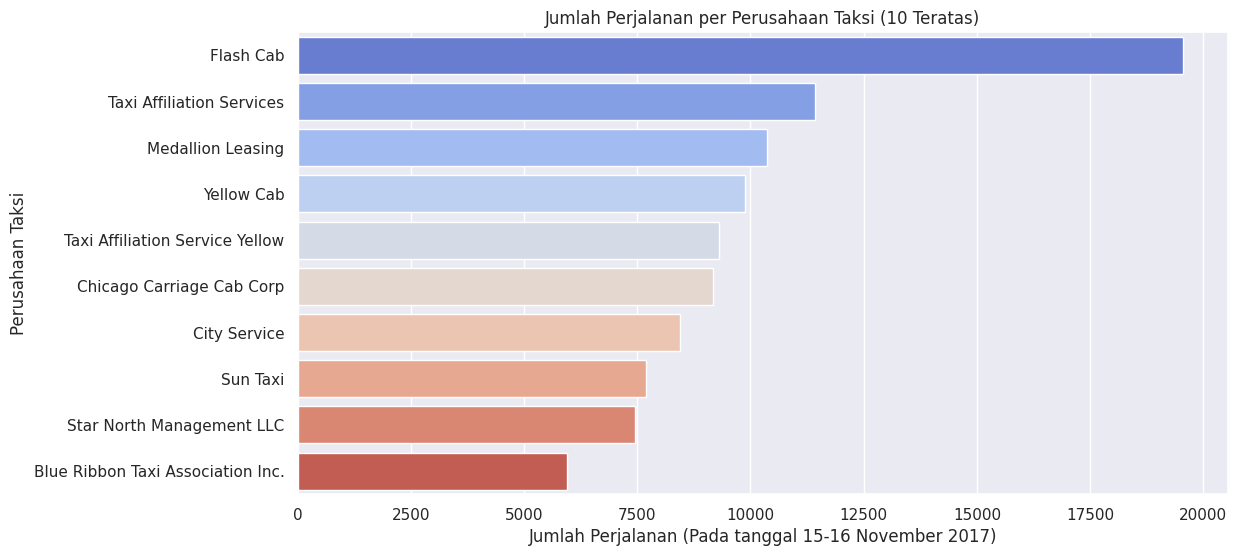

In [18]:
# Pilih 10 perusahaan taksi teratas
# topten_region = exposure01.head(10)
top10_company

# Atur gaya plot dengan Seaborn
sns.set(style="darkgrid")

# Membuat grafik batang dengan palet "coolwarm" dari Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=top10_company, palette='coolwarm')
plt.title("Jumlah Perjalanan per Perusahaan Taksi (10 Teratas)")
plt.xlabel('Jumlah Perjalanan (Pada tanggal 15-16 November 2017)')
plt.ylabel('Perusahaan Taksi')
plt.show()

**10 Wilayah Teratas Untuk Dataset exposure02**

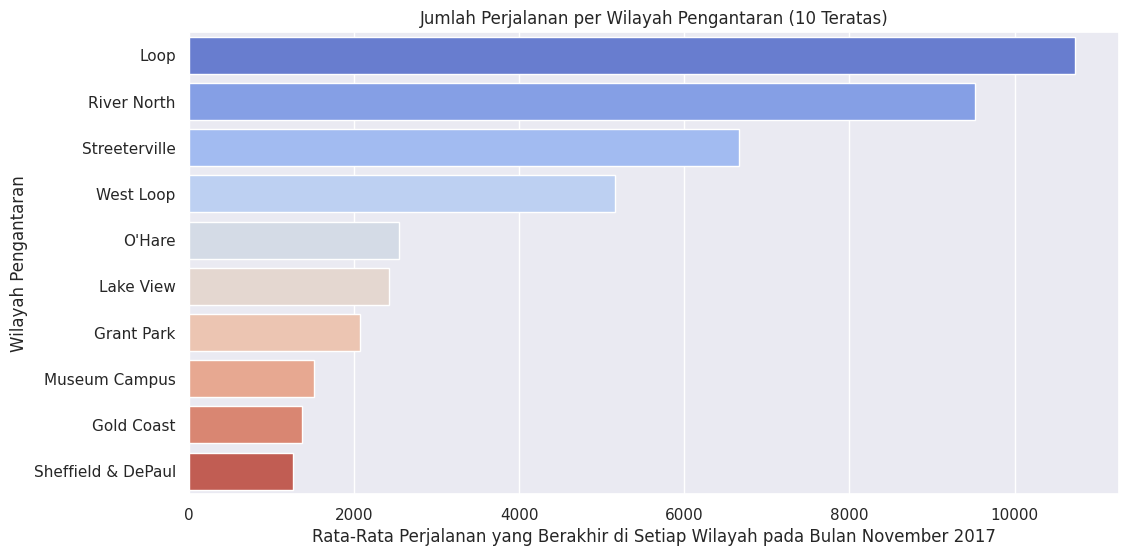

In [19]:
# Pilih 10 wilayah teratas
# top_10_locations = exposure02.head(10)
top10_droppoff

# Atur gaya plot dengan Seaborn
sns.set(style="darkgrid")

# Membuat grafik batang dengan palet "coolwarm" dari Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='average_trips', y='dropoff_location_name', data=top10_droppoff, palette='coolwarm')
plt.title("Jumlah Perjalanan per Wilayah Pengantaran (10 Teratas)")
plt.xlabel('Rata-Rata Perjalanan yang Berakhir di Setiap Wilayah pada Bulan November 2017')
plt.ylabel('Wilayah Pengantaran')
plt.show()

# **2.1.5. Menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya**

**Kesimpulan Sementara**

Jumlah Perjalanan pada tanggal 15-16 November 2017 di 10 teratas adalah:

1.  Flash Cab
2.  Taxi Affiliation Services
3.  Medallion Leasing
4.  Yellow Cab
5.  Taxi Affiliation Service Yellow
6.  Chicago Carriage Cab Corp
7.  City Service
8.  Sun Taxi
9.  Star North Management LLC
10. Blue Ribbon Taxi Association Inc.

**Kesimpulan Sementara**

Rata-Rata Perjalanan yang Berakhir di Setiap Wilayah pada Bulan November 2017 adalah:

1.  Loop
2.  River North
3.  Streeterville
4.  West Loop
5.  O'Hare
6.  Lake View
7.  Grant Park
8.  Museum Campus
9.  Gold Coast
10. Sheffield & Depaul

# **2.2. Menguji hipotesis (Python) dengan memuat dataset: /datasets/project_sql_result_07.csv**

`/datasets/project_sql_result_07` merupakan hasil dari kueri terakhir yang bervariable yaitu hypothesis . File ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare.

# **2.2.1 Mempelajari Isi Data (khusus untuk data hypothesis)**

In [20]:
#Memeriksa informasi dari Dataset
predictive_analytics.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


**Temuan**

Kita mungkin akan mengubah dengan tipe data yang sesuai, melihat isi dataset tersebut. Di dalam dataset ini deskripsi tersebut untuk hypothesis yaitu:

**start_ts -- tanggal dan waktu penjemputan**

**weather_conditions -- kondisi cuaca saat perjalanan dimulai**

**duration_seconds -- durasi perjalanan dalam satuan detik**

**Memastikan Tipe Data Sudah Benar (khusus untuk data hypothesis)**

In [21]:
# Menampilkan informasi hasil project_sql_result_07
predictive_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


**Temuan Sementara**

Kita akan mengubah tipe data untuk kolom start_ts dan duration_seconds sebagai tipe data yang sesuai. Selain itu tidak ada data yang hilang untuk dataset tersebut.

In [22]:
# Menampilkan informasi dataset project_sql_result_07 dengan data yang telah diubah
predictive_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


In [23]:
# Menampilkan informasi yang telah dirubah tipe data nya
predictive_analytics.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
5,2017-11-11 04:00:00,Good,1320
6,2017-11-04 16:00:00,Bad,2969
7,2017-11-18 11:00:00,Good,2280
8,2017-11-11 14:00:00,Good,2460
9,2017-11-11 12:00:00,Good,2040


* Saatnya kita uji hypothesis dataset diatas yang sudah diperbaiki

In [24]:
# Merubah tipe data kolom start_ts
predictive_analytics['start_ts'] = pd.to_datetime(predictive_analytics['start_ts'])
predictive_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


In [25]:
# Memastikan semua dataset project_sql_result_07 adalah hari Sabtu semua
# Ternyata semua data kita adalah hari sabtu (The day of the week with Monday=0, Sunday=6.)
predictive_analytics['start_ts'].dt.weekday.unique()

array([5])

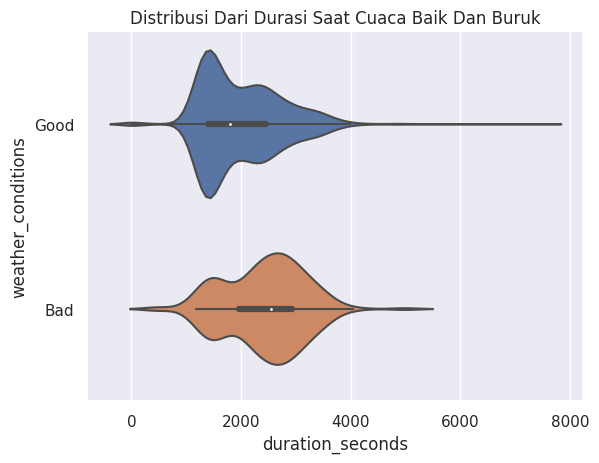

In [26]:
# Cek distribusi dari durasi saat cuaca baik dan buruk
plt.title('Distribusi Dari Durasi Saat Cuaca Baik Dan Buruk')
sns.violinplot(data=predictive_analytics, x='duration_seconds', y='weather_conditions')
plt.show()

**Temuan Sementara**

Kalau kita lihat disini distribusi datanya berbeda, keterpusatan median datanya kalau cuaca baik cenderung kekiri dan kalau cuaca buruk cenderung ke kanan. Artinya cuaca baik cenderung durasinya lebih cepat, sedangkan cuaca buruk durasinya lebih lama. 

# **2.2.2 Menguji H0 & H1 untuk Dataset predictive_analytics (Hypothesis data)**

Uji hipotesis berikut: "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu."

Yang berarti:

<span style="color:green">Alpha yang ditentukan yaitu 5% atau 0.05</span>.

<span style="color:blue">H0 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK SAMA saat hujan di hari Sabtu."</span>.

<span style="color:red">H1 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare SAMA saat hujan di hari Sabtu."</span>.



In [27]:
# Menampilkan dataset hypothesis
predictive_analytics.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
5,2017-11-11 04:00:00,Good,1320
6,2017-11-04 16:00:00,Bad,2969
7,2017-11-18 11:00:00,Good,2280
8,2017-11-11 14:00:00,Good,2460
9,2017-11-11 12:00:00,Good,2040


In [28]:
# mempersiapkan perhitungan data varians
# hitung rata-rata pada dataset
avg_predictive_analytics = pd.pivot_table(predictive_analytics, index='weather_conditions',  values='duration_seconds', aggfunc='mean').reset_index()
avg_predictive_analytics

,weather_conditions,duration_seconds
0,Bad,2427.205556
1,Good,1999.675676


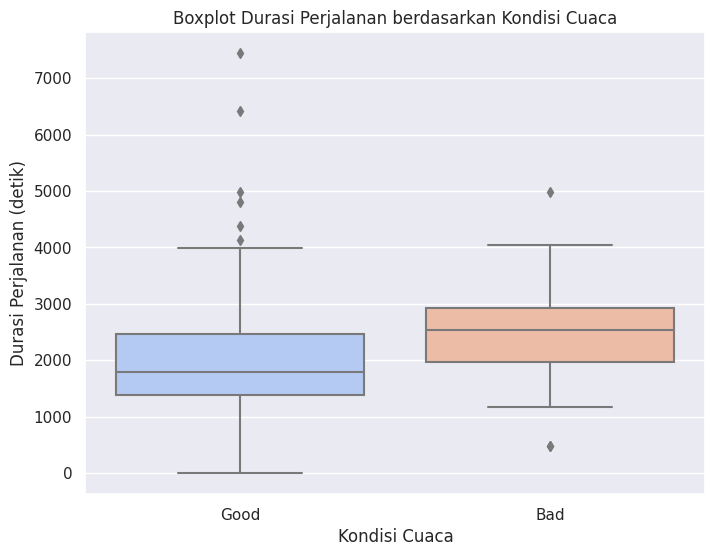

In [29]:
# Data agregat (data asli)
avg_predictive_analytics = pd.pivot_table(predictive_analytics, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()

# Buat boxplot dengan Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=predictive_analytics, palette='coolwarm')

# Tambahkan judul dan label sumbu
plt.title("Boxplot Durasi Perjalanan berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Durasi Perjalanan (detik)")

plt.show()

**Kesimpulan Sementara**

Terlihat bahwa nilai Good memiliki data yang condong ke kanan dan memilki banyak nilai outliers. Sedangkan nilai Bad berada di sekitar interquartile range yang mengindikasikan bahwa banyak data yang terdistribusi di dalam visualisasi boxplot tersebut.

In [30]:
# Melakukan penghapusan outliers
Q1 = predictive_analytics['duration_seconds'].quantile(0.25)
Q3 = predictive_analytics['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outliers
predictive_analytics_no_outliers = predictive_analytics[(predictive_analytics['duration_seconds'] >= lower_bound) & (predictive_analytics['duration_seconds'] <= upper_bound)]

In [31]:
# Agregasi tanpa outliers
predictive_analytics_no_outliers_avg = pd.pivot_table(predictive_analytics_no_outliers, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()
predictive_analytics_no_outliers_avg

,weather_conditions,duration_seconds
0,Bad,2412.944134
1,Good,1979.266138


* Bisa kita lihat, perubahan data tidak begitu signifikan. Namun kita akan tetap lakukan dengan menggunakan data yang tidak ada outliers nya untuk menguji hypothesis.

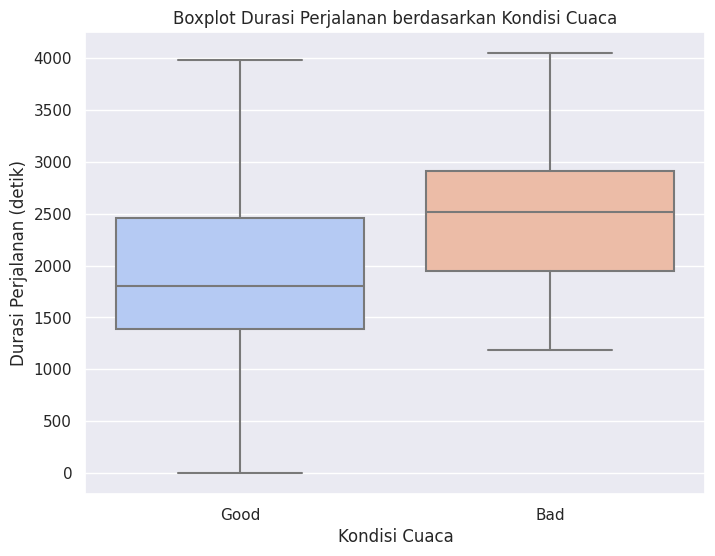

In [32]:
# Data agregat tanpa outliers
predictive_analytics_no_outliers_avg = pd.pivot_table(predictive_analytics_no_outliers, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()
# Buat boxplot dengan Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=predictive_analytics_no_outliers, palette='coolwarm', showfliers=False)

# Tambahkan judul dan label sumbu
plt.title("Boxplot Durasi Perjalanan berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Durasi Perjalanan (detik)")

plt.show()

* Di sini kita akan menghapus outliers yang terdapat pada visualisasi boxplot yang sudah kita tampilkan. Hal ini bertujuan agar perhitungan uji testing hypothesis lebih akurat.

<span style="color:green">Alpha yang ditentukan yaitu 5% atau 0.05</span>.

<span style="color:blue">H0 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK BERUBAH saat hujan di hari Sabtu."</span>.

<span style="color:red">H1 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare BERUBAH saat hujan di hari Sabtu."</span>.

In [33]:
# Memisahkan data menjadi dua bagian yaitu : "Bad" dan "Good"
bad_data = predictive_analytics_no_outliers[predictive_analytics_no_outliers['weather_conditions'] == 'Bad']['duration_seconds']
good_data = predictive_analytics_no_outliers[predictive_analytics_no_outliers['weather_conditions'] == 'Good']['duration_seconds']

# Lakukan uji Levene
statistic, p_value_levene = levene(bad_data, good_data)

# Cetak hasil uji Levene
print("Statistic:", statistic)
print("P-Value (Levene):", p_value_levene)

alpha = 0.05

if p_value_levene < alpha:
    print('Menerima H1')
else:
    print('Menerima H0')

Statistic: 0.24647542861629418
P-Value (Levene): 0.6196707782686355
Menerima H0


* Setelah itu kita akan melakukan ttest_ind dengan set parameter equal_var dr hasil levene test, jika varians sama maka set True, dan sebaliknya.

In [34]:
# Lakukan uji Levene
statistic_levene, p_value_levene = stats.levene(bad_data, good_data)

# Cetak hasil uji Levene
print("Levene Statistic:", statistic_levene)
print("P-Value (Levene):", p_value_levene)

# Tentukan tingkat signifikansi (alpha) untuk uji t-test
alpha = 0.05

# Lakukan uji t-test independen dengan parameter equal_var yang disesuaikan
if p_value_levene < alpha:
    t_statistic, p_value_ttest = stats.ttest_ind(bad_data, good_data, equal_var=False)
    print("T-Statistic (Unequal Variance):", t_statistic)
    print("P-Value (T-Test):", p_value_ttest)
    print("Menerima H1: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare BERUBAH saat hujan di hari Sabtu.")
else:
    t_statistic, p_value_ttest = stats.ttest_ind(bad_data, good_data, equal_var=True)
    print("T-Statistic (Equal Variance):", t_statistic)
    print("P-Value (T-Test):", p_value_ttest)
    print("Menerima H0: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK BERUBAH saat hujan di hari Sabtu.")

Levene Statistic: 0.24647542861629418
P-Value (Levene): 0.6196707782686355
T-Statistic (Equal Variance): 7.5110122934882755
P-Value (T-Test): 1.2430038032744411e-13
Menerima H0: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK BERUBAH saat hujan di hari Sabtu.


**Kesimpulan Sementara**

Hypothesis menerima H0

# **3. Kesimpulan Umum**

* Untuk saat ini tidak ditemukan nilai yang kosong. Seluruh data benar-benar utuh.
* Tipe data bisa saja sudah sesuai. Kita harus analisa lebih lanjut.
* Jumlah Perjalanan pada tanggal 15-16 November 2017 di 10 teratas adalah:
  1. Flash Cab
  2. Taxi Affiliation Services
  3. Medallion Leasing
  4. Yellow Cab
  5. Taxi Affiliation Service Yellow
  6. Chicago Carriage Cab Corp
  7. City Service
  8. Sun Taxi
  9. Star North Management LLC
 10. Blue Ribbon Taxi Association Inc.

* Rata-Rata Perjalanan yang Berakhir di Setiap Wilayah pada Bulan November 2017 adalah:
  1. Loop
  2. River North
  3. Streeterville
  4. West Loop
  5. O'Hare
  6. Lake View
  7. Grant Park
  8. Museum Campus
  9. Gold Coast
 10. Sheffield & Depaul
 
* Terlihat bahwa nilai Good memiliki data yang condong ke kanan dan memilki banyak nilai outliers. Sedangkan nilai Bad berada di sekitar interquartile range yang mengindikasikan bahwa banyak data yang terdistribusi di dalam visualisasi boxplot tersebut.

* Hypothesis menerima H0